In [18]:
%%capture
!pip install torch torch-geometric
!pip install  dgl -f https://data.dgl.ai/wheels/torch-2.1/repo.html
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
import pandas as pd
import dgl
import dgl.nn as dglnn
import torch
from dgl.nn import SAGEConv
import networkx as nx
from dgl.dataloading import GraphDataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, roc_curve, f1_score, average_precision_score

In [15]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/posture1.csv', sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
def Labelling(Rows):
    count = 0
    for digit in Rows:
        if digit == 1:
            count += 1

    if (count > 17):
      Label="0"
    elif (12 < count <= 17):
      Label="1"
    else:
      Label="2"
    return Label

df["label"]=df.apply(Labelling, axis=1)

df.head()

,SSpecNetAC,SSpecNetAU,SSpecNetCA,SSpecNetIA,SSpecNetSA,SSpecNetSC,SSpecNetSI,SSpecComAC,SSpecComAU,SSpecComCA,...,RSpecAuxCP,RSpecAuxIR,RSpecAuxMA,RSpecAuxMP,RSpecAuxPE,RSpecAuxPL,RSpecAuxPM,RSpecAuxPS,RSpecAuxRA,label
0,2,3,1,4,2,2,3,2,4,3,...,4,1,3,3,2,2,2,1,3,1
1,4,4,3,1,1,1,4,4,2,3,...,3,3,2,3,2,3,3,2,3,1
2,3,4,1,3,3,4,4,4,1,4,...,4,4,3,2,4,3,3,1,2,2
3,3,4,1,2,1,2,1,3,3,1,...,1,4,1,3,4,4,4,3,3,0
4,1,1,2,2,1,2,3,3,3,4,...,1,4,4,4,4,2,4,4,2,1


In [17]:
label=list(df.label)
one=0
two=0
three=0
a={'1':one,'2':two,'3':three}
for i in label:
  count=0
  if i =='1':
    count+=1
    one=one+count
  elif i =='2':
    count+=1
    two=count+two
  elif i=='0':
    count+=1
    three=three+count
a={'1':one,'2':two,'3':three}
print(a)

{'1': 4960, '2': 1263, '3': 3777}


94/94 [==============================] - 0s 1ms/step - loss: 7.7704 - accuracy: 0.6067


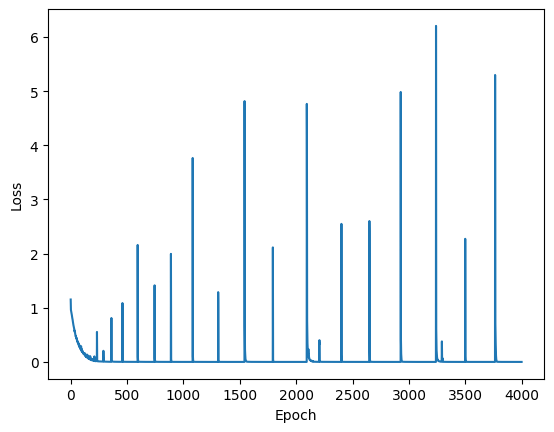

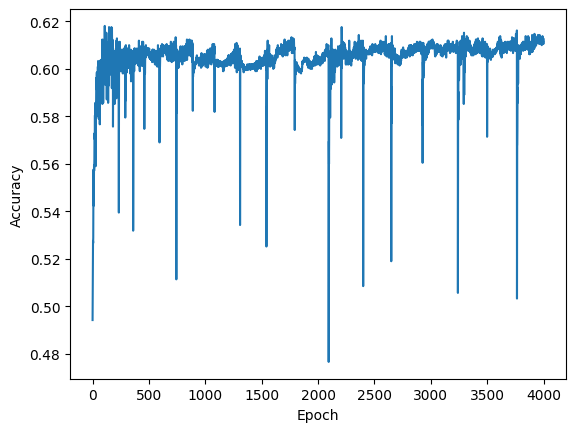

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df.drop('label', axis=1)
y = df['label']

y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=4000, batch_size=100, validation_split=0.3, verbose=0)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
#print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig("FNN Training loss over Epochs.png")

plt.show()

#plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig("FNN Testing Accuracy over Epochs.png")

plt.show()

94/94 [==============================] - 0s 1ms/step


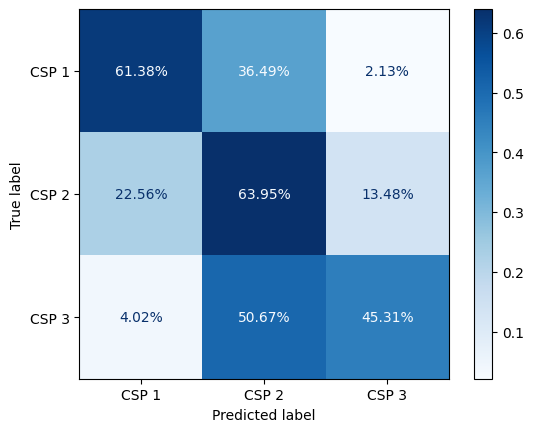

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

confusion = confusion_matrix(y_test.to_numpy().argmax(axis=1), y_pred.argmax(axis=1))

class_percentages = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

#sns.heatmap(class_percentages, annot=True, fmt=".2%", cmap="Blues", cbar=True, xticklabels=['CSP 1', 'CSP 2', 'CSP 3'], yticklabels=['CSP 1', 'CSP 2', 'CSP 3'])
#plt.xlabel('Predicted label')
#plt.ylabel('True label')

#plt.savefig("FNN Confusion Matrix.png")
#plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#model.eval()
#with torch.no_grad():
 #   logits = model(graph, features)
#    predicted_labels = torch.argmax(logits, dim=1).numpy()

#ConfusionMatrixDisplay.from_predictions(labels, predicted_labels, display_labels=["CSP 1", "CSP 2", "CSP 3"],cmap='Blues')

#conf_matrix = confusion_matrix(y_test, y_pred,labels=["CSP 1", "CSP 2", "CSP 3"])
#class_percentages = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

disp = ConfusionMatrixDisplay(confusion_matrix=class_percentages, display_labels=["CSP 1", "CSP 2", "CSP 3"])

disp.plot(cmap=plt.cm.Blues, values_format='.2%')

plt.savefig("fnn Confusion Matrix.png")
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━

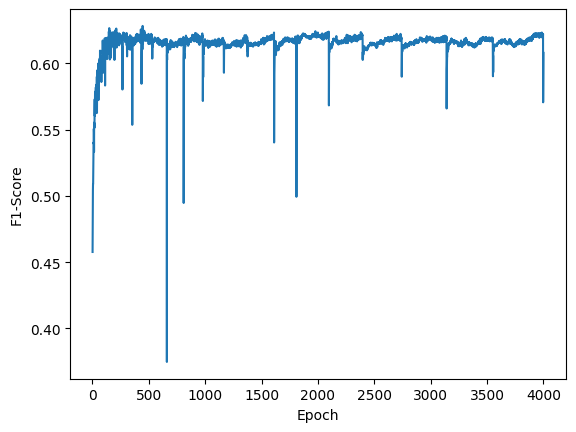

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1_scores = []
epochs = 4000

for epoch in range(epochs):

    history = model.fit(X_train, y_train, epochs=1, batch_size=100, validation_split=0.3, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test.to_numpy(), axis=1)
    f1 = f1_score(y_true_classes, y_pred_classes, average='micro')

    f1_scores.append(f1)

plt.plot(range(1, epochs + 1), f1_scores)
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.savefig("FNN F1 over Epochs.png")
plt.show()

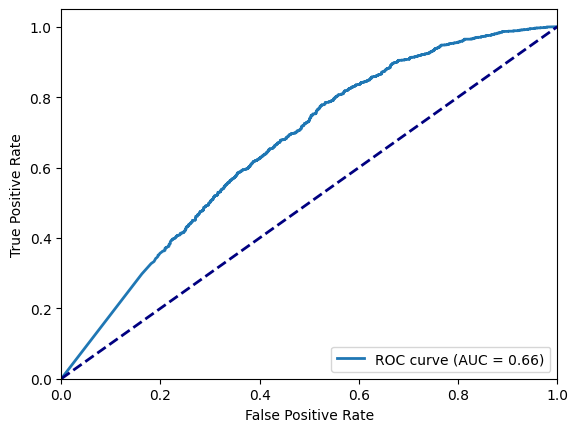

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

roc_auc_list = []

epochs = 4000

for epoch in range(epochs):

    fpr, tpr, _ = roc_curve(y_test.to_numpy()[:, 1], y_pred[:, 1])  # Use class 1 probabilities

    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)

plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig("FNN ROC.png")
plt.legend(loc='lower right')
plt.show()


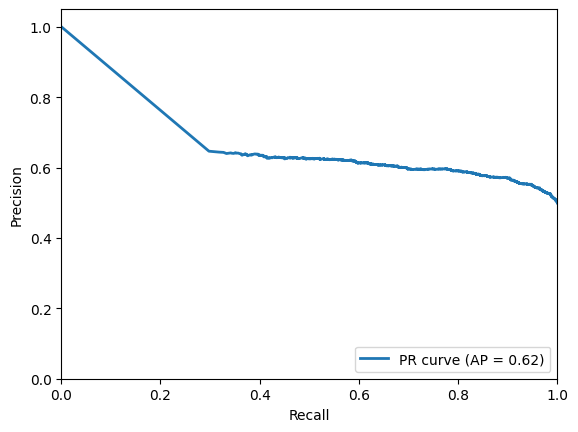

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

average_precision_list = []

epochs = 4000

for epoch in range(epochs):

    #y_pred = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test.to_numpy()[:, 1], y_pred[:, 1])

    avg_precision = average_precision_score(y_test.to_numpy()[:, 1], y_pred[:, 1])
    average_precision_list.append(avg_precision)

plt.plot(recall, precision,lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(['PR curve (AP = %0.2f)' % avg_precision for avg_precision in average_precision_list],loc="lower right")
plt.savefig("FNN PR.png")
plt.show()

In [ ]:
object_columns = df.select_dtypes(include=[object]).columns
df[object_columns] = df[object_columns].apply(pd.to_numeric, errors='coerce')
features = torch.tensor(df.iloc[:, :-1].values, dtype=torch.float)
#print(features)
labels = torch.tensor(df['label'].values, dtype=torch.long)
num_nodes = len(df)

graph = dgl.graph(([], []))
#graph = dgl.add_self_loop(graph)

for i in range(len(df.index) - 1):
    source_node = df.index[i]
    target_node = df.index[i + 1]
    graph.add_edges(source_node, target_node)
    graph.add_edges(target_node, source_node)

import random

def add_random_edge(graph, num_nodes):
    source = random.randint(0, num_nodes - 1)
    target = random.randint(0, num_nodes - 1)
    if source != target:
        if random.choice([True, False]):
            graph.add_edges(source, target)
        else:
            #graph.add_edges(source, target)
            graph.add_edges(target, source)

num_interconnecting_edges = 1000

for _ in range(num_interconnecting_edges):
    add_random_edge(graph, num_nodes)

graph.ndata['features'] = features
graph.ndata['labels'] = labels

In [ ]:
import pickle
with open('/content/drive/MyDrive/graph2.pkl', 'wb') as f:
    pickle.dump(graph, f)

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
(tensor([   0,    1,    1,  ..., 9998, 9998, 9999]), tensor([   1,    0,    2,  ..., 9997, 9999, 9998]))


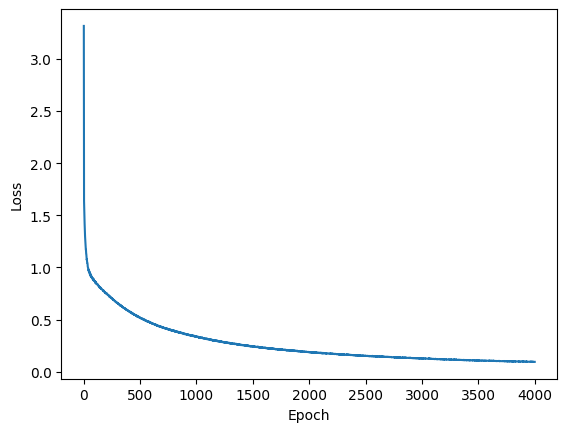

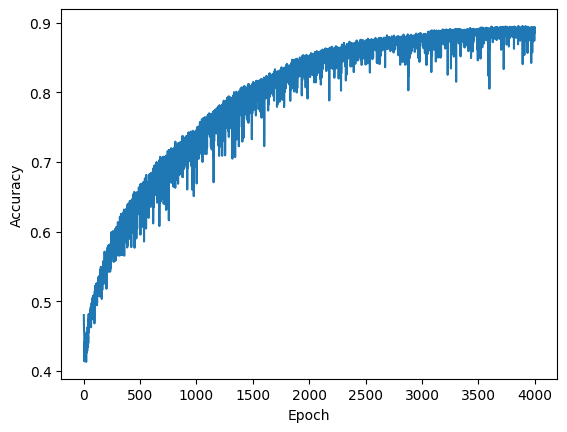

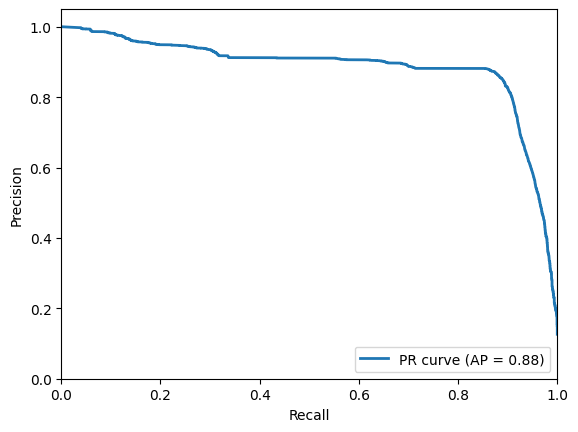

In [ ]:
input_size = features.size(1)
hidden_size = 64
output_size = len(torch.unique(labels))

class GNN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GNN, self).__init__()
        self.conv1 = SAGEConv(in_feats, hidden_size, 'mean')
        self.conv2 = SAGEConv(hidden_size, num_classes, 'mean')

    def forward(self, graph, features):
        x = self.conv1(graph, features)
        x = F.relu(x)
        x = self.conv2(graph, x)
        return x

train_percentage = 0.7
num_train_nodes = int(train_percentage * len(df))
train_idx = list(range(num_train_nodes))

num_test_nodes =  num_nodes - num_train_nodes
test_idx = list(range(num_test_nodes))

batch_size = 100
train_loader = GraphDataLoader(list(train_idx), batch_size=batch_size, shuffle=True)
test_loader = GraphDataLoader(list(test_idx), batch_size=batch_size, shuffle=True)

#print("Features shape:", features.shape)
#print("Graph nodes:", graph.number_of_nodes())
#print("Graph edges:", graph.number_of_edges())
print(graph.edges())
unique_labels = torch.unique(labels)
#print("Unique Labels:", unique_labels)
#print("Number of Unique Labels:", len(unique_labels))

model = GNN(input_size, hidden_size, output_size)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=5e-4)

def train():
    model.train()
    total_loss = 0
    for batched_train_idx in train_loader:
        optimizer.zero_grad()
        batched_graph = dgl.node_subgraph(graph, batched_train_idx)
        logits = model(batched_graph, features[batched_train_idx])
        loss = F.cross_entropy(logits, labels[batched_train_idx])
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test():
    model.eval()
    test_predictions = []
    predicted_probs =[]
    test_labels = []
    #testing_loss = 0.0
    batch_indices = []
    with torch.no_grad():
        for batched_test_idx in test_loader:
            batch_indices.append(batched_test_idx)
            global test_graph
            test_graph = dgl.node_subgraph(graph, batched_test_idx)
            logits = model(test_graph, features[batched_test_idx])
            predicted_labels = torch.argmax(logits, dim=1).numpy()
            predicted_prob = F.softmax(logits, dim=1).numpy()
            test_predictions.extend(predicted_labels)
            predicted_probs.extend(predicted_prob)
            test_labels.extend(labels[batched_test_idx].numpy())
            test_labels_tensor = torch.tensor(predicted_labels, dtype=torch.long)
            #testing_loss += F.cross_entropy(logits, test_labels_tensor).item()

    accuracy = accuracy_score(test_labels, test_predictions)
    #testing_loss /= len(test_loader)

    return accuracy, test_predictions, batch_indices,predicted_probs

num_epochs = 4000
losses = []
accuracies = []
testing_predictions = []
for epoch in range(num_epochs):
    loss = train()
    accuracy, test_predictions, batch_indices, predicted_probs = test()
    losses.append(loss)
    accuracies.append(accuracy)
    testing_predictions.append(test_predictions)

plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig("Training Loss over Epochs.png")
plt.show()

plt.plot(range(1, num_epochs + 1), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig("Testing Accuracy over Epochs.png")
plt.show()

batch_indices_tensor = torch.cat(batch_indices)
test_predictions_np = np.array(test_predictions)
predicted_probs_np=np.array(predicted_probs)

precision = dict()
recall = dict()
average_precision = dict()
for i in range(output_size):
    class_labels = (labels[batch_indices_tensor] == i).numpy().astype(int)
    precision[i], recall[i], _ = precision_recall_curve(class_labels, predicted_probs_np[:, i])
    average_precision[i] = average_precision_score(class_labels, predicted_probs_np[:, i])

all_precision = np.unique(np.concatenate([precision[i] for i in range(output_size)]))
mean_recall = np.zeros_like(all_precision)
for i in range(output_size):
    mean_recall += np.interp(all_precision, precision[i], recall[i])
mean_recall /= output_size
overall_average_precision = np.mean([average_precision[i] for i in range(output_size)])

plt.plot(mean_recall, all_precision, lw=2, label='PR curve (AP = {0:0.2f})'.format(overall_average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.savefig("PR.png")
plt.show()

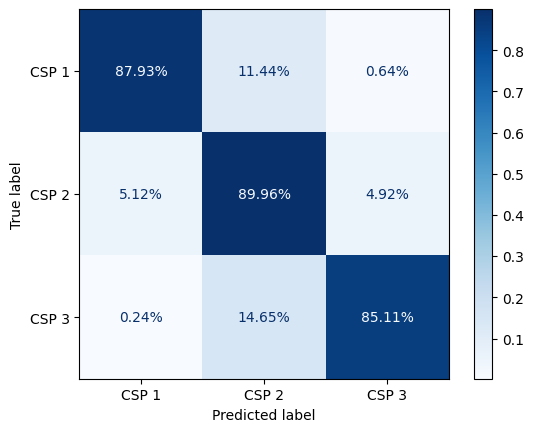

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(labels[batch_indices_tensor], test_predictions_np)
class_percentages = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

disp = ConfusionMatrixDisplay(confusion_matrix=class_percentages, display_labels=["CSP 1", "CSP 2", "CSP 3"])

disp.plot(cmap=plt.cm.Blues, values_format='.2%')

plt.savefig("Confusion Matrix.png")
plt.show()

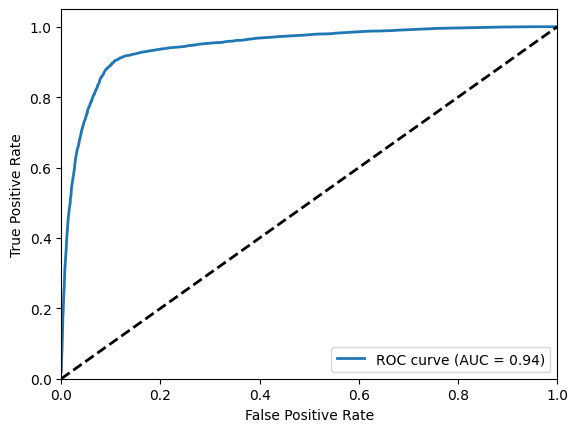

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(output_size):
    class_labels = (labels[batch_indices_tensor] == i).numpy().astype(int)
    fpr[i], tpr[i], _ = roc_curve(class_labels, predicted_probs_np[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(output_size)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(output_size):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= output_size
overall_roc_auc = auc(all_fpr, mean_tpr)

plt.plot(all_fpr, mean_tpr, lw=2, label='ROC curve (AUC = {0:0.2f})'.format(overall_roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("ROC.png")
plt.show()

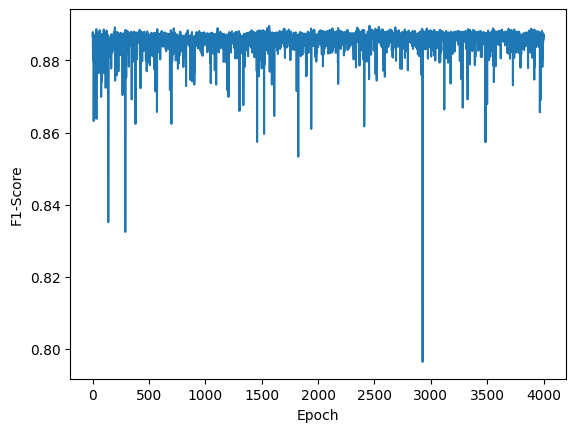

In [ ]:
train_f1_scores = []
valid_f1_scores = []

for epoch in range(num_epochs):
    train_loss = train()

    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        predicted_labels = torch.argmax(logits, dim=1).numpy()
        train_f1 = f1_score(labels, predicted_labels, average='micro')
        train_f1_scores.append(train_f1)

    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        predicted_labels = torch.argmax(logits, dim=1).numpy()
        valid_f1 = f1_score(labels, predicted_labels, average='micro')
        valid_f1_scores.append(valid_f1)


plt.plot(np.arange(1, num_epochs + 1), valid_f1_scores, label='Testing F1-Score')
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.savefig("F1-Score Over Epochs.png")
plt.show()